# Getting Started

## Using Cameras

In [1]:
import CameraTransform as ct

# intrinsic camera parameters
f = 6.2
sensor_size = (6.17, 4.55)
image_size = (3264, 2448)

# initialize the camera
cam = ct.Camera(ct.RectilinearProjection(focallength_mm=f, 
                                         sensor=sensor_size,
                                         image=image_size),
               ct.SpatialOrientation(elevation_m=10,
                                     tilt_deg=45))

In [2]:
cam.elevation_m = 34.027
cam.tilt_deg = 83.307926
cam.roll_deg = -1.916219

In [3]:
cam.imageFromSpace([3.17, 8, 0])

array([ 2513.01903033, 10302.79024379])

In [4]:
cam.imageFromSpace([[3.17, 8, 0],
                    [3.17, 8, 10],
                    [4.12, 10, 0],
                    [4.12, 10, 10]])

array([[ 2513.01903033, 10302.79024379],
       [ 2709.93369714,  8257.53176532],
       [ 2613.01526893,  8957.64510958],
       [ 2788.36057303,  7108.36064027]])

In [5]:
cam.spaceFromImage([2445, 1569])

array([ 39.04004539, 156.98250489,   0.        ])

In [6]:
cam.spaceFromImage([2445, 1569], X=10)

array([10.        , 43.4940148 , 24.58546926])

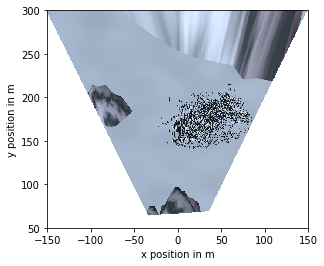

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
# display a top view of the image
im = plt.imread("CameraImage.jpg")
top_im = cam.getTopViewOfImage(im, [-150, 150, 50, 300], scaling=0.5, do_plot=True)
plt.xlabel("x position in m")
plt.ylabel("y position in m");